In [37]:
import pandas as pd
import torch
import plotly.figure_factory as ff

In [38]:
df = pd.read_csv('names.csv')

In [39]:
names = df['NAMES'].tolist()

In [44]:
#Char to integer mapping for converting each character to integer
stoi = {s:i for i,s in enumerate(sorted(set("".join(names))))}
stoi["."] = 26

In [45]:
#Integer to character mapping
itos = {i:s for s,i in stoi.items()}

In [53]:
a= torch.zeros((27,27), dtype=torch.int32)

In [54]:
for name in names:
    tokenized_name = ["."]+list(name)+["."] #ADDING: start and end tokens
    for chr1,chr2 in zip(tokenized_name,tokenized_name[1:]):
        i1 = stoi[chr1]
        i2 = stoi[chr2]
        a[i1,i2] += 1

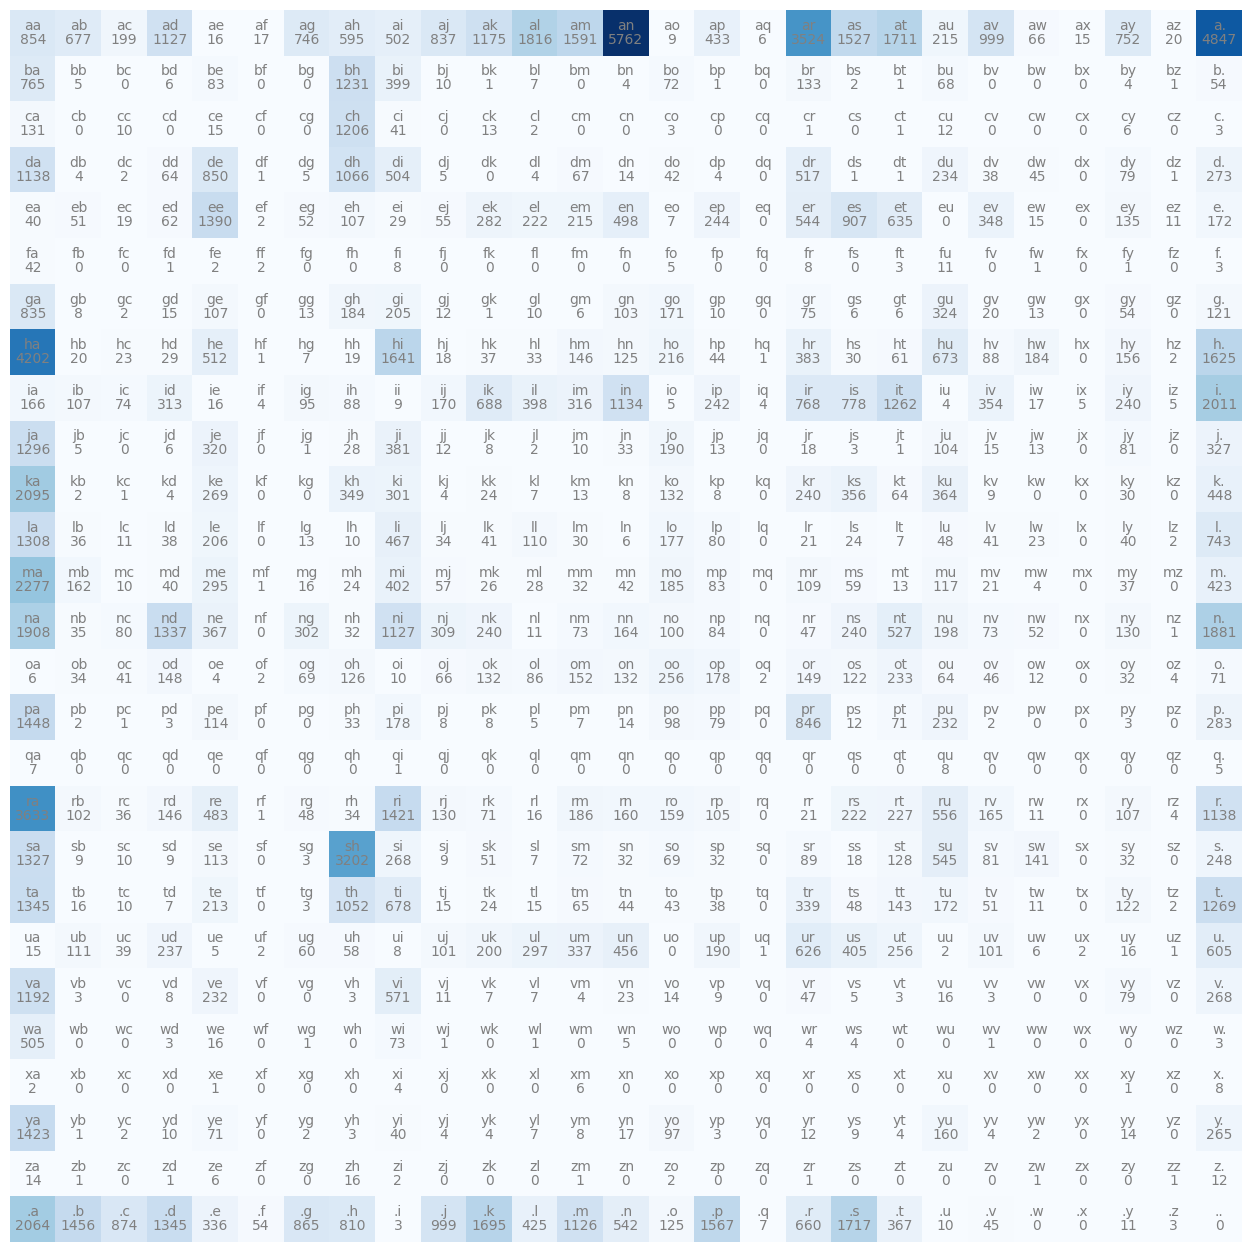

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(a, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, a[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [82]:
# Getting Probability distribution for each row
P = (a + 1).float()
P /= P.sum(1,keepdim=True)

In [83]:
a.sum(1,keepdim=True).shape

torch.Size([27, 1])

In [84]:
# Sampling from the probability distribution
g = torch.Generator().manual_seed(2147483647)
for i in range(15):
    idx=0
    s = ''
    while(True):
        idx = torch.multinomial(P[idx], 1, replacement=True, generator=g).item() #P[idx] is the probability distribution of next char given first char
        c = itos[idx]
        if(c == '.'):
            break
        s = s + c
        
    print(s)

susadwignshi.
ryu.
pa.
dhvarsan.
jajarisves.
i.
rcatakshimajamazhandhrpretinrama.
.
n.
anah.
agani.
vaninjarvayeharnesahadeeentitjaha.
u.
.
gniri.


In [ ]:
# Results look bad but they some do make sense

In [ ]:
# Estimating model quality using Likelihood of observed data
# We work with log likelihood as product of probabilites become very small and then average it
'''
In statistics, maximum likelihood estimation (MLE) is a method of estimating
the parameters of an assumed probability distribution, given some observed data. 
This is achieved by maximizing a likelihood function so that, 
under the assumed statistical model, the observed data is most probable. 
'''

In [ ]:
# To avoid infinite loss we will smoothen model
# Add a number to all the counts

In [85]:
log_likelyhood = 0.0
n=0
for name in names:
    tokenized_name = ["."]+list(name)+["."] #ADDING: start and end tokens
    for chr1,chr2 in zip(tokenized_name,tokenized_name[1:]):
        i1 = stoi[chr1]
        i2 = stoi[chr2]
        n += 1
        log_likelyhood += torch.log(P[i1,i2])
print(-log_likelyhood/n)

tensor(2.2799)


In [ ]:
#SCORE : 2.2799